In [2]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import math
#from ipywidgets import interact, interactive, fixed, interact_manual
#import ipywidgets as widgets

In [3]:
t1 = numpy.linspace(start=0.0, stop=1.0, num=201)

In [4]:
# FIXME: this is now relative, maybe make it absolute
ad = 0.05   # attack/decay (the not active part)

def envelope(v, ctrl):
    p0 = None
    p1 = None
    if ctrl < 0.5:
        # Determine active segment and define control points
        if v < ad:
            # static attack segment
            p0 = (0.0, 0.0)
            p1 = (ad, 1.0)
        else:
            c = ctrl * 2.0
            xc = ad + ((1.0 - ad) * c)
            if v < xc:
                p0 = (ad, 1.0)
                p1 = (xc, c)
            else:
                p0 = (xc, c)
                p1 = (1.0, 0.0)
    else:
        ade = 1.0 - ad
        # Determine active segment and define control points
        if v < ade:
            c = (ctrl - 0.5) * 2.0
            xc = ad + ((1.0 - ad) * c)
            if v < xc:
                p0 = (0.0, 0.0)
                p1 = (xc, 1.0 - c)
            else:
                p0 = (xc, 1.0 - c)
                p1 = (ade, 1.0)
        else:
            # static decay segment
            p0 = (ade, 1.0)
            p1 = (1.0, 0.0)

    # The segment range we interpolate
    pd = (p1[0]-p0[0], p1[1]-p0[1])
    # 0.0 ... 1.0 the value 'v' is on the segment
    pct = 0.0
    if pd[0] > 0.0:
        pct = (v - p0[0]) / pd[0]        
    v = p0[1] + (pct * pd[1])
    return v

v_envelope = numpy.vectorize(envelope, excluded=['ctrl'])

# https://github.com/jupyter-widgets/ipywidgets/issues/1718
#env = interact(v_envelope, v=fixed(t1), ctrl=(0.0,1.0,0.05))

env_0_0 = v_envelope(t1, 0.0)
env_0_1 = v_envelope(t1, 0.1)
env_0_2 = v_envelope(t1, 0.2)
env_0_3 = v_envelope(t1, 0.3)
env_0_4 = v_envelope(t1, 0.4)
env_0_5 = v_envelope(t1, 0.5)
env_0_6 = v_envelope(t1, 0.6)
env_0_7 = v_envelope(t1, 0.7)
env_0_8 = v_envelope(t1, 0.8)
env_0_9 = v_envelope(t1, 0.9)
env_1_0 = v_envelope(t1, 1.0)

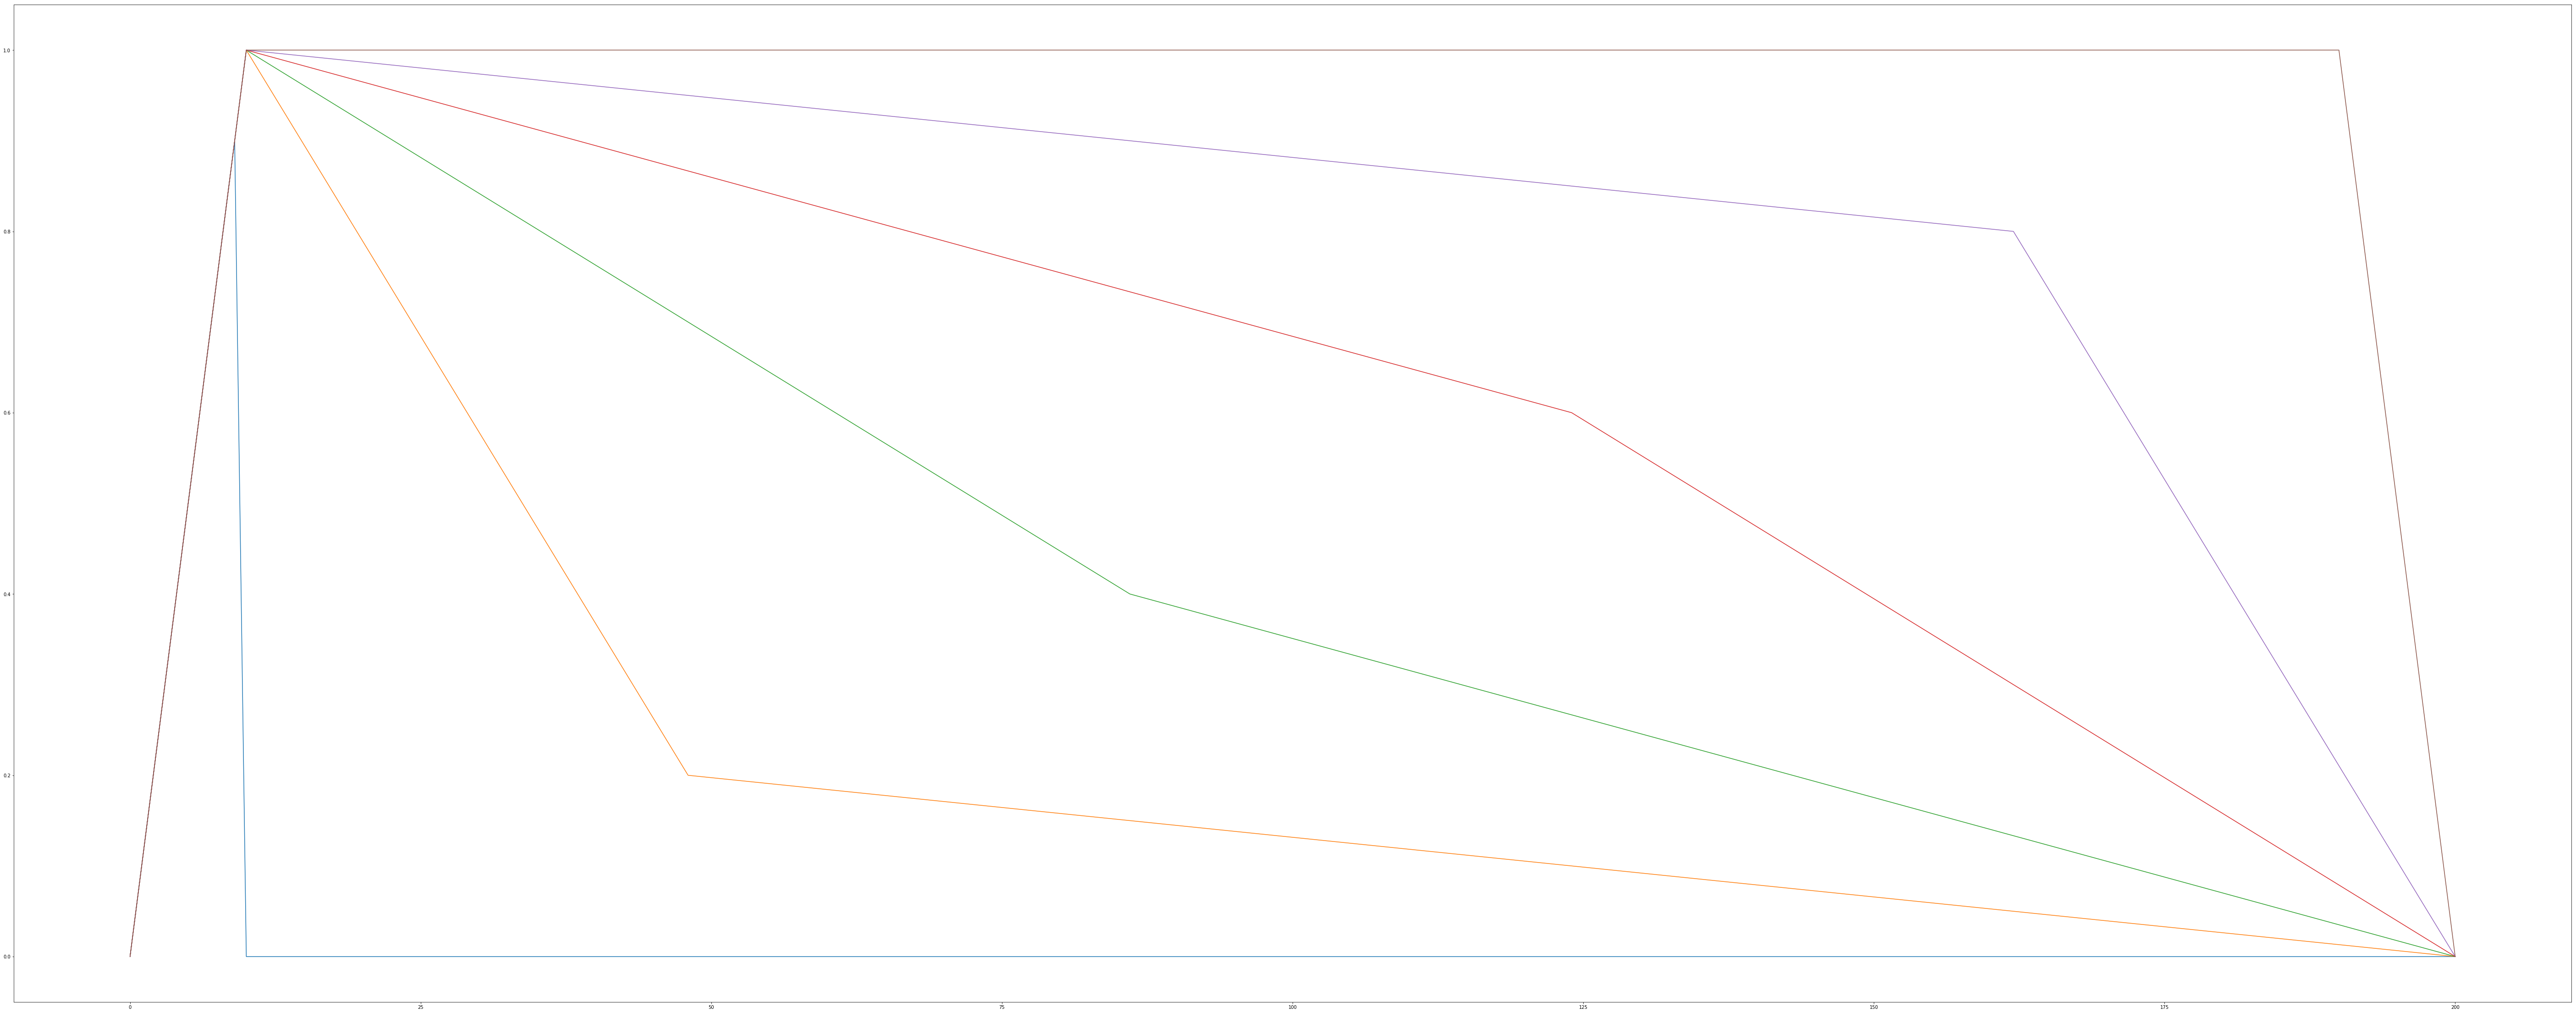

In [8]:
plt.figure(figsize=(100, 40))
#plt.plot(t1)
plt.plot(env_0_0)
plt.plot(env_0_1)
plt.plot(env_0_2)
plt.plot(env_0_3)
plt.plot(env_0_4)
plt.plot(env_0_5)
plt.show()

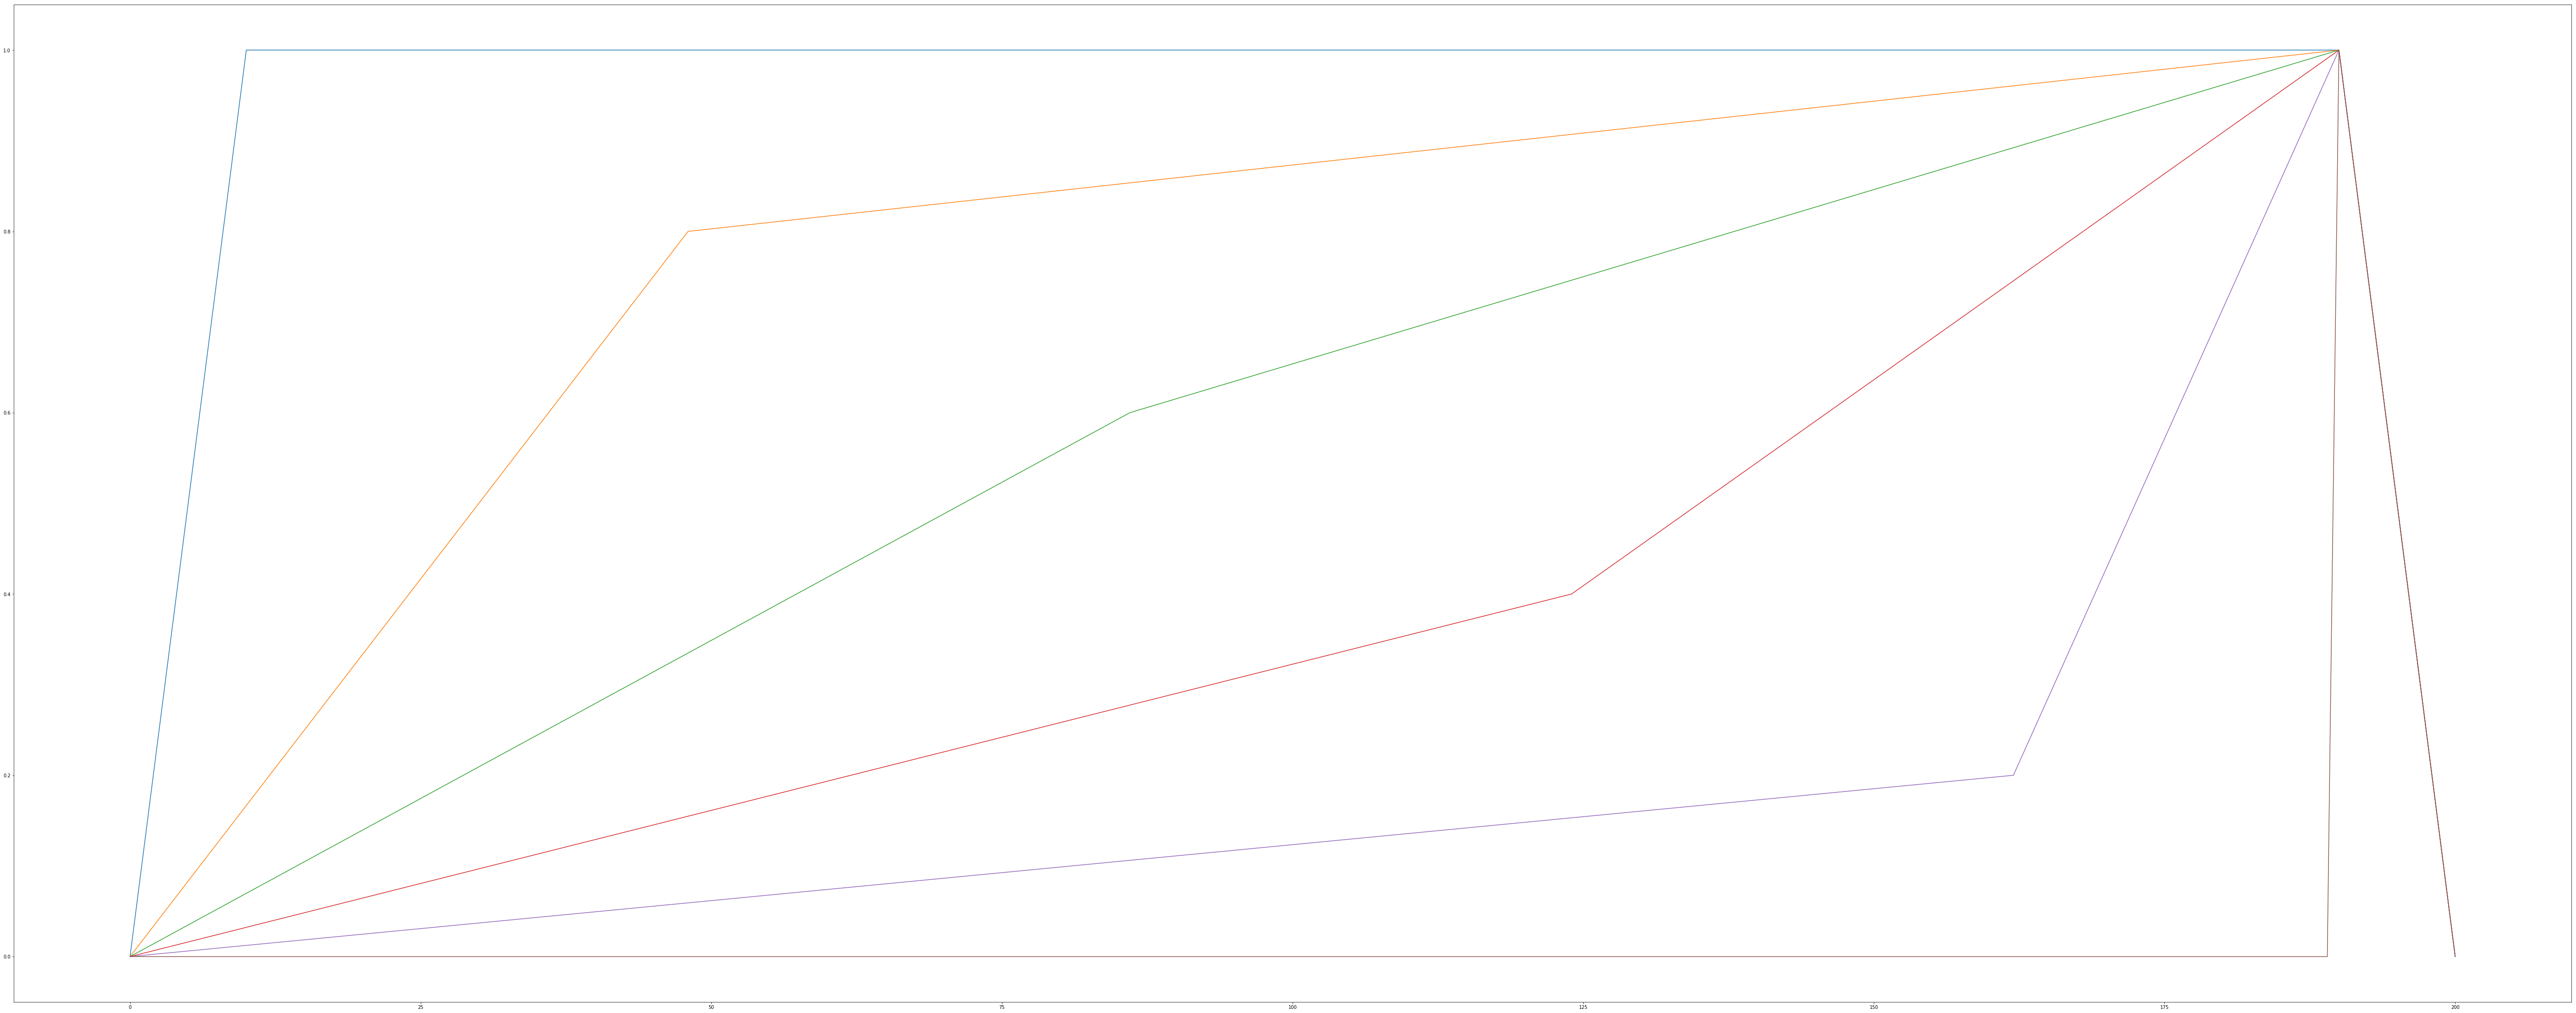

In [7]:
plt.figure(figsize=(100, 40))
#plt.plot(t1)
plt.plot(env_0_5)
plt.plot(env_0_6)
plt.plot(env_0_7)
plt.plot(env_0_8)
plt.plot(env_0_9)
plt.plot(env_1_0)
plt.show()